<a href="https://colab.research.google.com/github/shivanswamynathan/NLP/blob/main/IMDB_review_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np


Loding Data

In [84]:
data = pd.read_csv('IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [85]:
data.shape

(50000, 2)

In [69]:
count = data['sentiment'].value_counts()
count

,count
sentiment,
positive,25000
negative,25000


In [70]:
null_values = data.isnull().sum() #identifying missing values

In [71]:
print('There are {} missing values for {} and {} missing values for {}.'.format(null_values[0],null_values.index[0],null_values[1],null_values.index[1]))

There are 0 missing values for review and 0 missing values for sentiment.


<ipython-input-71-5d7a3fbb60f7>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('There are {} missing values for {} and {} missing values for {}.'.format(null_values[0],null_values.index[0],null_values[1],null_values.index[1]))


In [86]:
num_duplicates = data.duplicated().sum() #identify duplicates
print('There are {} duplicate reviews present in the dataset'.format(num_duplicates))

There are 418 duplicate reviews present in the dataset


In [87]:
#view duplicate reviews
review = data['review']
duplicated_review = data[review.isin(review[review.duplicated()])].sort_values("review")
duplicated_review.head()

,review,sentiment
34058,"""Go Fish"" garnered Rose Troche rightly or wron...",negative
47467,"""Go Fish"" garnered Rose Troche rightly or wron...",negative
29956,"""Three"" is a seriously dumb shipwreck movie. M...",negative
31488,"""Three"" is a seriously dumb shipwreck movie. M...",negative
47527,"""Witchery"" might just be the most incoherent a...",negative


In [88]:
#drop duplicate reviews
data.drop_duplicates(inplace = True)

In [89]:
data_copy = data.copy()

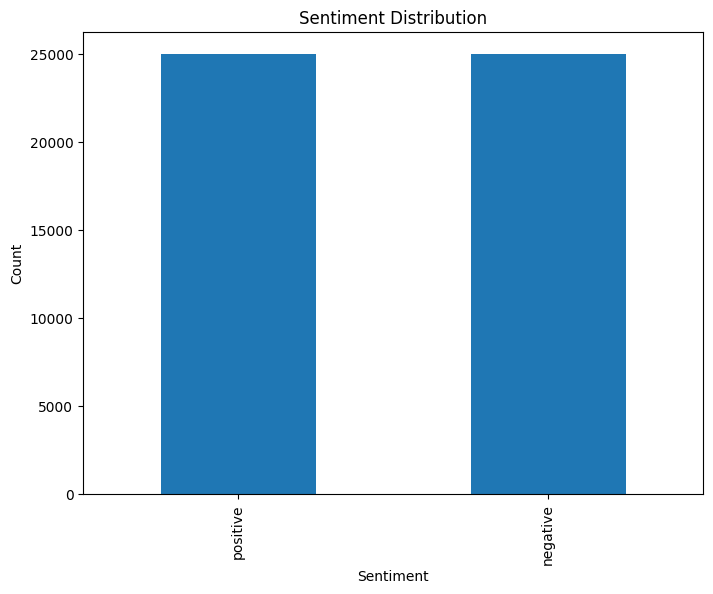

In [75]:
# prompt: in sentiment catagary count positvi and negative and plot

import matplotlib.pyplot as plt
# Plot the sentiment counts
plt.figure(figsize=(8, 6))
count.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49582 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49582 non-null  object
 1   sentiment  49582 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sentiment'] = le.fit_transform(data['sentiment'])
data.head()

,review,sentiment,Sentiment
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [78]:
X = data["review"]
y = data["Sentiment"]

Train Test Split

In [79]:
from sklearn.model_selection import train_test_split
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
y_test.shape

(10000,)

Bag of Words (BoW)

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Convert text to BoW features
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [81]:
model_bow = MultinomialNB()
model_bow.fit(X_train_bow, y_train)

MultinomialNB()

In [82]:
y_pred_bow = model_bow.predict(X_test_bow)
accuracy_bow = accuracy_score(y_test, y_pred_bow)
print("BoW Accuracy:", accuracy_bow)

BoW Accuracy: 0.8512655036805485


In [83]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred_bow)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      4939
           1       0.87      0.82      0.85      4978

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917



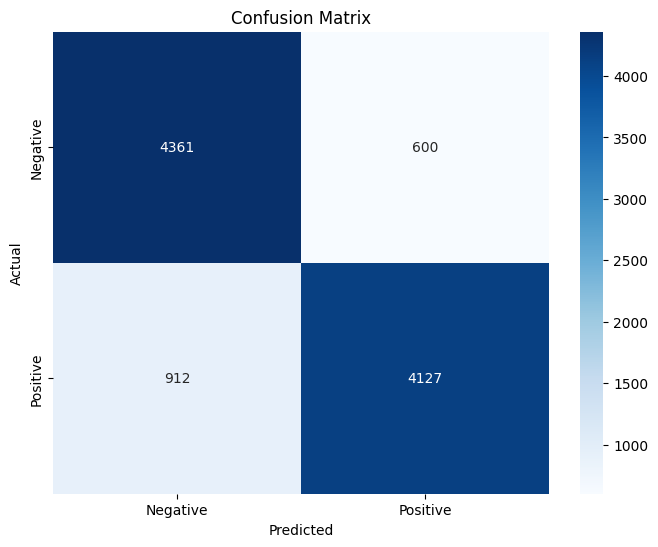

In [21]:
# prompt: i need only confution matice

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_bow)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [22]:
test_text = "The movie was so bad and I would not recommend it to anyone."
sentiment = model_bow.predict(vectorizer.transform([test_text]))
print("Sentiment:", sentiment)

Sentiment: [0]


In [23]:
test_text = "The movie good"
sentiment = model_bow.predict(vectorizer.transform([test_text]))
print("Sentiment:", sentiment)

Sentiment: [0]


In [24]:
test_text = "I absolutely loved the movie! It was fantastic and heartwarming."
sentiment = model_bow.predict(vectorizer.transform([test_text]))
print("Sentiment:", sentiment)

Sentiment: [1]


GloVe

In [25]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2024-12-17 04:55:26--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-12-17 04:55:26--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-12-17 04:55:26--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [26]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [27]:
glove_file = "glove.6B.100d.txt"
embeddings_index = {}
with open(glove_file, encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype="float32")
        embeddings_index[word] = coefs

In [28]:
# Convert text to GloVe embeddings
def get_glove_vector(text):
    words = text.split()
    vectors = [embeddings_index.get(word, np.zeros(100)) for word in words]
    return np.mean(vectors, axis=0)

In [29]:
X_train_glove = np.vstack(X_train.apply(get_glove_vector))
X_test_glove = np.vstack(X_test.apply(get_glove_vector))

In [30]:
# Train a classifier (e.g., Logistic Regression)
from sklearn.linear_model import LogisticRegression
model_glove = LogisticRegression(max_iter=500)
model_glove.fit(X_train_glove, y_train)

LogisticRegression(max_iter=500)

In [31]:
# Evaluate
y_pred_glove = model_glove.predict(X_test_glove)
accuracy_glove = accuracy_score(y_test, y_pred_glove)
print("GloVe Accuracy:", accuracy_glove)

GloVe Accuracy: 0.7879


In [32]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred_glove)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.79      4961
           1       0.79      0.78      0.79      5039

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



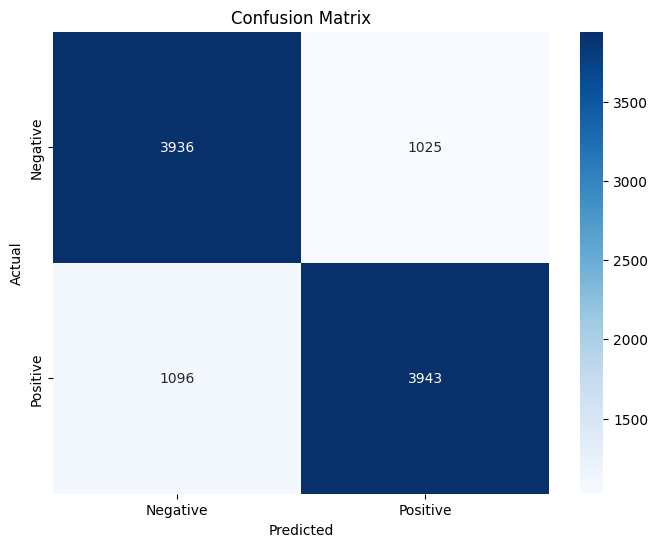

In [33]:
# prompt: i need only confution matice

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_glove)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [34]:
test_text = "The movie is  good but I would not recommend it to anyone."
sentiment = model_glove.predict(get_glove_vector(test_text).reshape(1, -1))
print("Sentiment:", sentiment)

Sentiment: [0]


In [35]:
test_text = "The movie was good "
sentiment = model_glove.predict(get_glove_vector(test_text).reshape(1, -1))
print("Sentiment:", sentiment)

Sentiment: [1]


Word2Vec

In [36]:
from gensim.models import Word2Vec

# Train Word2Vec on the training data
sentences = [review.split() for review in X_train]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

In [37]:
# Convert text to Word2Vec embeddings
def get_word2vec_vector(text):
    words = text.split()
    vectors = [word2vec_model.wv[word] if word in word2vec_model.wv else np.zeros(100) for word in words]
    return np.mean(vectors, axis=0)

In [38]:
X_train_word2vec = np.vstack(X_train.apply(get_word2vec_vector))
X_test_word2vec = np.vstack(X_test.apply(get_word2vec_vector))

In [39]:
# Train a classifier (e.g., Logistic Regression)
model_word2vec = LogisticRegression(max_iter=200)
model_word2vec.fit(X_train_word2vec, y_train)

LogisticRegression(max_iter=200)

In [40]:
# Evaluate
y_pred_word2vec = model_word2vec.predict(X_test_word2vec)
accuracy_word2vec = accuracy_score(y_test, y_pred_word2vec)
print("Word2Vec Accuracy:", accuracy_word2vec)

Word2Vec Accuracy: 0.8198


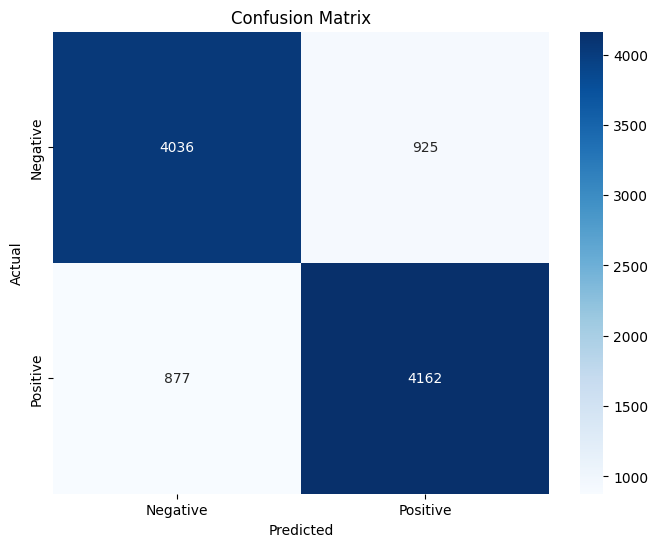

In [41]:
# prompt: i need only confution matice

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_word2vec)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [42]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred_word2vec)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      4961
           1       0.82      0.83      0.82      5039

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



In [43]:
test_text = "The movie is  good but I would not recommend it to anyone."
sentiment = model_word2vec.predict(get_word2vec_vector(test_text).reshape(1, -1))
print("Sentiment:", sentiment)


Sentiment: [1]


In [44]:
test_text = "The movie was so bad and I would not recommend it to anyone."
sentiment = model_word2vec.predict(get_word2vec_vector(test_text).reshape(1, -1))
print("Sentiment:", sentiment)


Sentiment: [0]


In [45]:
test_text = "The movie is good "
sentiment = model_word2vec.predict(get_word2vec_vector(test_text).reshape(1, -1))
print("Sentiment:", sentiment)

Sentiment: [1]


In [46]:
test_text = "The movie was good "
sentiment = model_word2vec.predict(get_word2vec_vector(test_text).reshape(1, -1))
print("Sentiment:", sentiment)

Sentiment: [0]


BERT

In [47]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments

import torch
from torch.utils.data import Dataset

# Initialize BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [48]:
class IMDbDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts.tolist()  # Ensure texts are in list format
        self.labels = labels.tolist()  # Ensure labels are in list format

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = tokenizer(
            text,
            padding="max_length",  # Pad all sequences to the max length
            truncation=True,       # Truncate sequences longer than max length
            max_length=128,        # Set the max sequence length
            return_tensors="pt"    # Return PyTorch tensors
        )
        # Squeeze to remove unnecessary dimensions and include 'labels' in the output
        encoding = {key: val.squeeze(0) for key, val in encoding.items()}
        encoding['labels'] = torch.tensor(label)  # Add the label
        return encoding


In [49]:
# Create datasets
train_dataset = IMDbDataset(X_train, y_train)
test_dataset = IMDbDataset(X_test, y_test)

In [50]:
# Load BERT model with 2 output labels (positive/negative)
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",             # Directory to save model checkpoints
    num_train_epochs=1,                 # Number of training epochs
    per_device_train_batch_size=2,      # Batch size for training
    per_device_eval_batch_size=4,       # Batch size for evaluation
    warmup_steps=500,                   # Number of warmup steps
    max_steps=1000,         # Train for only 1000 steps
    weight_decay=0.01,                  # Weight decay for regularization
    logging_dir="./logs",               # Directory to save logs
    evaluation_strategy="epoch",        # Evaluate at the end of every epoch
    report_to="none"
)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [95]:
pip install transformers

In [98]:
# Install Hugging Face Transformers if not already installed
# pip install transformers

from transformers import pipeline
import pandas as pd

# Load the dataset

df = pd.read_csv('IMDB Dataset.csv')
# Load the sentiment-analysis pipeline with a pre-trained BERT model
sentiment_analyzer = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Select a small sample for testing
sample_data = data.sample(100, random_state=42)  # Take a sample of 100 rows
sample_reviews = sample_data['review'].tolist()

# Perform sentiment analysis on the sample reviews, limiting the sequence length
predictions = []
for review in sample_reviews:
    prediction = sentiment_analyzer(review, truncation=True, max_length=512) #add truncation and max_length arguments
    predictions.extend(prediction)

# Add predictions to the sample data
sample_data['predicted_sentiment'] = [pred['label'] for pred in predictions]
sample_data['predicted_score'] = [pred['score'] for pred in predictions]

# Save the results to a CSV
sample_data[['review', 'sentiment', 'predicted_sentiment', 'predicted_score']].to_csv("sample_predictions.csv", index=False)

In [99]:
sample_data = pd.read_csv('sample_predictions.csv')
sample_data.head()

,review,sentiment,predicted_sentiment,predicted_score
0,"""Soul Plane"" is a horrible attempt at comedy t...",negative,2 stars,0.866122
1,Guest from the Future tells a fascinating stor...,positive,4 stars,0.543640
2,"""National Treasure"" (2004) is a thoroughly mis...",negative,2 stars,0.558951
3,"OK. First said, I just wanted to check whether...",negative,3 stars,0.372782
4,"I haven't always been a fan, but the show grew...",positive,3 stars,0.419734


In [100]:

text = "I absolutely loved this movie; it was fantastic!"

# Perform sentiment analysis
prediction = sentiment_analyzer(text)

# Display the prediction
print(f"Text: {text}")
print(f"Predicted Sentiment: {prediction[0]['label']}")
print(f"Confidence Score: {prediction[0]['score']:.2f}")


Text: I absolutely loved this movie; it was fantastic!
Predicted Sentiment: 5 stars
Confidence Score: 0.95


In [101]:

text = "The movie was so bad and I would not recommend it to anyone."

# Perform sentiment analysis
prediction = sentiment_analyzer(text)

# Display the prediction
print(f"Text: {text}")
print(f"Predicted Sentiment: {prediction[0]['label']}")
print(f"Confidence Score: {prediction[0]['score']:.2f}")


Text: The movie was so bad and I would not recommend it to anyone.
Predicted Sentiment: 1 star
Confidence Score: 0.81
